In [1]:
import pandas as pd
import os
import glob

In [5]:
meta_df = pd.read_csv('CBIS-DDSM/csv/meta.csv')
meta_df.head()

SeriesInstanceUID  \
0  1.3.6.1.4.1.9590.100.1.2.117041576511324414842...   
1  1.3.6.1.4.1.9590.100.1.2.438738396107617880132...   
2  1.3.6.1.4.1.9590.100.1.2.767416741131676463382...   
3  1.3.6.1.4.1.9590.100.1.2.296931352612305599800...   
4  1.3.6.1.4.1.9590.100.1.2.436657670120353100077...   

                                    StudyInstanceUID Modality  \
0  1.3.6.1.4.1.9590.100.1.2.229361142710768138411...       MG   
1  1.3.6.1.4.1.9590.100.1.2.195593486612988388325...       MG   
2  1.3.6.1.4.1.9590.100.1.2.257901172612530623323...       MG   
3  1.3.6.1.4.1.9590.100.1.2.109468616710242115222...       MG   
4  1.3.6.1.4.1.9590.100.1.2.380627129513562450304...       MG   

  SeriesDescription BodyPartExamined  SeriesNumber Collection  Visibility  \
0   ROI mask images           BREAST             1  CBIS-DDSM           1   
1   ROI mask images           BREAST             1  CBIS-DDSM           1   
2   ROI mask images           BREAST             1  CBIS-DDSM           1   
3   ROI mask images           BREAST             1  CBIS-DDSM           1   
4   ROI mask images           BREAST             1  CBIS-DDSM           1   

   ImageCount  
0           2  
1           2  
2           2  
3           2  
4           2

In [6]:
# 2. Prepare image paths and labels
image_paths = []
labels = [] 

In [ ]:
# code to get all the image paths
# only if needed
for index, row in meta_df.iterrows():
    series_uid = row['SeriesInstanceUID']
    image_files = [file for file in glob.glob('jpeg/**/*.jpg', recursive=True) if series_uid in file]

    for img_file in image_files:
        image_paths.append(img_file)
    
image_paths[:5]

In [11]:
dicom_data = pd.read_csv('CBIS-DDSM/csv/dicom_info.csv')
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [14]:
mass_case_df = pd.read_csv('CBIS-DDSM/csv/mass_case_description_train_set.csv')
mass_case_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [55]:
mass_case_df['pathology'].value_counts()

pathology
BENIGN       681
MALIGNANT    637
Name: count, dtype: int64

In [53]:
# Combine the two benign classes
mass_case_df['pathology'] = mass_case_df['pathology'].replace(
    {'BENIGN_WITHOUT_CALLBACK': 'BENIGN'}
)

In [15]:
mass_case_df[mass_case_df['patient_id'] == 'P_01265']

patient_id  breast_density left or right breast image view  \
884    P_01265               2                RIGHT         CC   
885    P_01265               2                RIGHT        MLO   

     abnormality id abnormality type mass shape   mass margins  assessment  \
884               1             mass       OVAL  CIRCUMSCRIBED           3   
885               1             mass       OVAL  CIRCUMSCRIBED           3   

    pathology  subtlety                                    image file path  \
884    BENIGN         5  Mass-Training_P_01265_RIGHT_CC/1.3.6.1.4.1.959...   
885    BENIGN         4  Mass-Training_P_01265_RIGHT_MLO/1.3.6.1.4.1.95...   

                               cropped image file path  \
884  Mass-Training_P_01265_RIGHT_CC_1/1.3.6.1.4.1.9...   
885  Mass-Training_P_01265_RIGHT_MLO_1/1.3.6.1.4.1....   

                                    ROI mask file path  
884  Mass-Training_P_01265_RIGHT_CC_1/1.3.6.1.4.1.9...  
885  Mass-Training_P_01265_RIGHT_MLO_1/1.3.6.1.4.1....

In [16]:
# Extract the substring before '/' and add it as a new column 'Full PatientID'
mass_case_df['Full PatientID'] = mass_case_df['image file path'].apply(lambda x: x.split('/')[0])

# Display the updated dataframe
mass_case_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                    Full PatientID  
0    Mass-Training_P_00001_LEFT_CC  
1   Mass-Training_P_00001_LEFT_MLO  
2    Mass-Training_P_00004_LEFT_CC  
3   Mass-Training_P_00004_LEFT_MLO  
4  Mass-Training_P_00004_RIGHT_MLO

In [106]:
# Perform an inner join and only select the 'image path' column from dicom_data
mass_new_df = pd.merge(mass_case_df, dicom_data[['PatientID', 'image_path']], 
                     left_on='Full PatientID', right_on='PatientID', how='inner')

# remove one of the common columns
mass_new_df.drop(columns='Full PatientID', inplace=True)
mass_new_df.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                         PatientID  \
0    Mass-Training_P_00001_LEFT_CC   
1   Mass-Training_P_00001_LEFT_MLO   
2    Mass-Training_P_00004_LEFT_CC   
3   Mass-Training_P_00004_LEFT_MLO   
4  Mass-Training_P_00004_RIGHT_MLO   

                                          image_path  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386...  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359308...  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.891800...  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.295360...  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.410524...

In [39]:
print(f"Number of records in merged_df: {mass_new_df.shape[0]}, Number of records in mass_case_df: {mass_case_df.shape[0]}")


Number of records in merged_df: 1318, Number of records in mass_case_df: 1318


In [40]:
img = list(mass_new_df['image_path'])
img[:5]

['CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386194811267636608694132590482924515/1-211.jpg',
 'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359308329312397897125630708681441180834/1-207.jpg',
 'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.89180046211022531834352631483669346540/1-250.jpg',
 'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg',
 'CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.410524754913057908920631336070876889890/1-056.jpg']

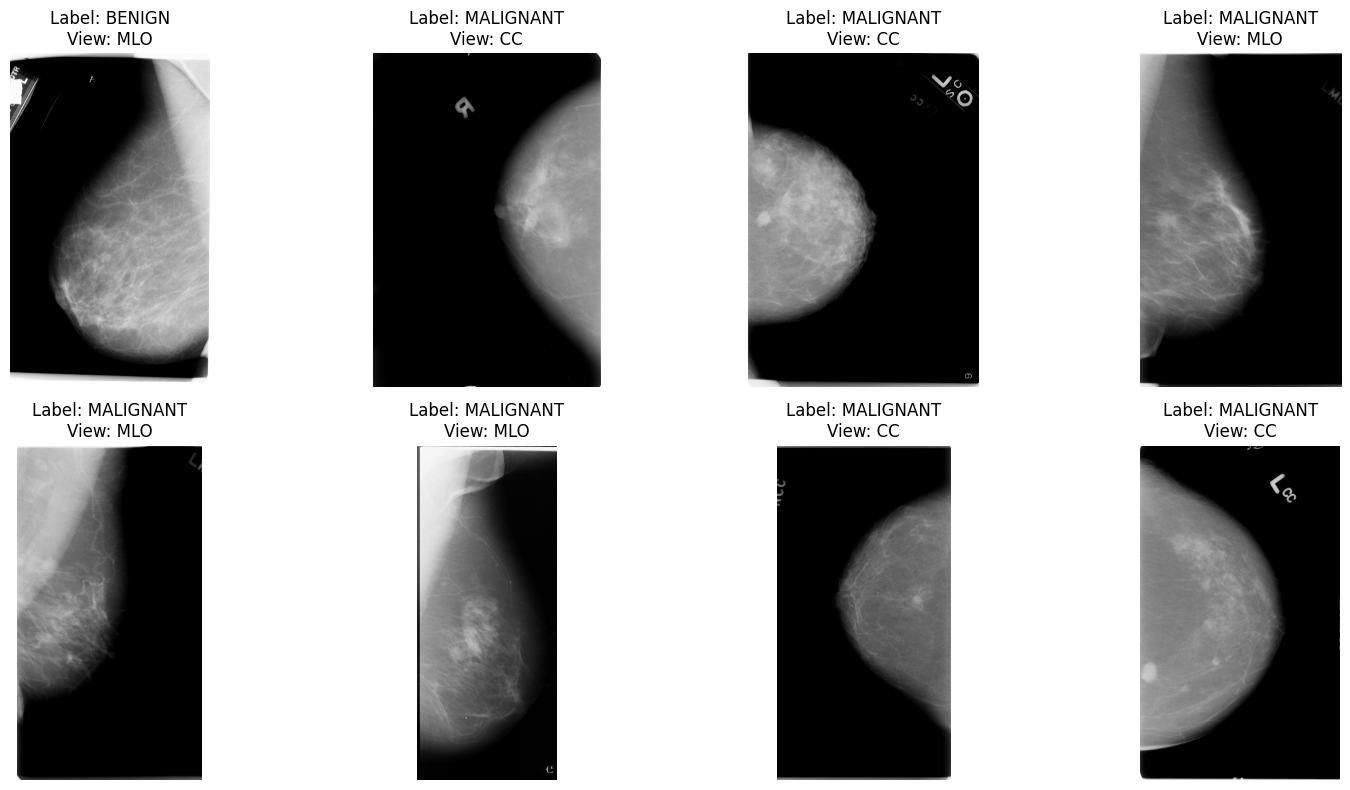

In [74]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Select a few records from the dataframe
sample_df = mass_new_df.sample(n=8)  # Adjust the number of images to display

# Create a 2x4 grid for displaying the images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Loop through the rows and columns to display the images
for i, ax in enumerate(axes.flat):
    # Get the image path, pathology label, and image view
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['pathology']
    image_view = sample_df.iloc[i]['image view']  # Assuming this column exists
    
    # Load the image
    img = mpimg.imread(img_path)
    
    # Display the image
    ax.imshow(img, cmap='gray')  # Assuming the images are grayscale; use 'cmap' accordingly
    ax.set_title(f"Label: {label}\nView: {image_view}")
    ax.axis('off')  # Hide axis

# Adjust layout
plt.tight_layout()
plt.show()

In [56]:
calc_case_df = pd.read_csv('CBIS-DDSM/csv/calc_case_description_train_set.csv')
calc_case_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [59]:
calc_case_df['pathology'].value_counts()

pathology
MALIGNANT                  544
BENIGN                     528
BENIGN_WITHOUT_CALLBACK    474
Name: count, dtype: int64

In [60]:
# Combine the two benign classes
calc_case_df['pathology'] = calc_case_df['pathology'].replace(
    {'BENIGN_WITHOUT_CALLBACK': 'BENIGN'}
)

In [58]:
# Extract the substring before '/' and add it as a new column 'Full PatientID'
calc_case_df['Full PatientID'] = calc_case_df['image file path'].apply(lambda x: x.split('/')[0])

# Display the updated dataframe
calc_case_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                    Full PatientID  
0   Calc-Training_P_00005_RIGHT_CC  
1  Calc-Training_P_00005_RIGHT_MLO  
2    Calc-Training_P_00007_LEFT_CC  
3   Calc-Training_P_00007_LEFT_MLO  
4    Calc-Training_P_00008_LEFT_CC

In [93]:
# Perform an inner join and only select the 'image path' column from dicom_data
calc_new_df = pd.merge(calc_case_df, dicom_data[['PatientID', 'image_path']], 
                     left_on='Full PatientID', right_on='PatientID', how='inner')

#remove one of the common columns
calc_new_df.drop(columns='Full PatientID', inplace=True)
calc_new_df.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  pathology  \
0    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
1    calcification    AMORPHOUS         CLUSTERED           3  MALIGNANT   
2    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
3    calcification  PLEOMORPHIC            LINEAR           4     BENIGN   
4    calcification          NaN          REGIONAL           2     BENIGN   

   subtlety                                    image file path  \
0         3  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1         3  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2         4  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3         4  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4         3  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                         PatientID  \
0   Calc-Training_P_00005_RIGHT_CC   
1  Calc-Training_P_00005_RIGHT_MLO   
2    Calc-Training_P_00007_LEFT_CC   
3   Calc-Training_P_00007_LEFT_MLO   
4    Calc-Training_P_00008_LEFT_CC   

                                          image_path  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.474143...  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.250596...  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.228699...  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.104743...  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.406725...

In [94]:
print(f"Number of records in merged_df: {calc_new_df.shape[0]}, Number of records in mass_case_df: {calc_case_df.shape[0]}")

Number of records in merged_df: 1546, Number of records in mass_case_df: 1546


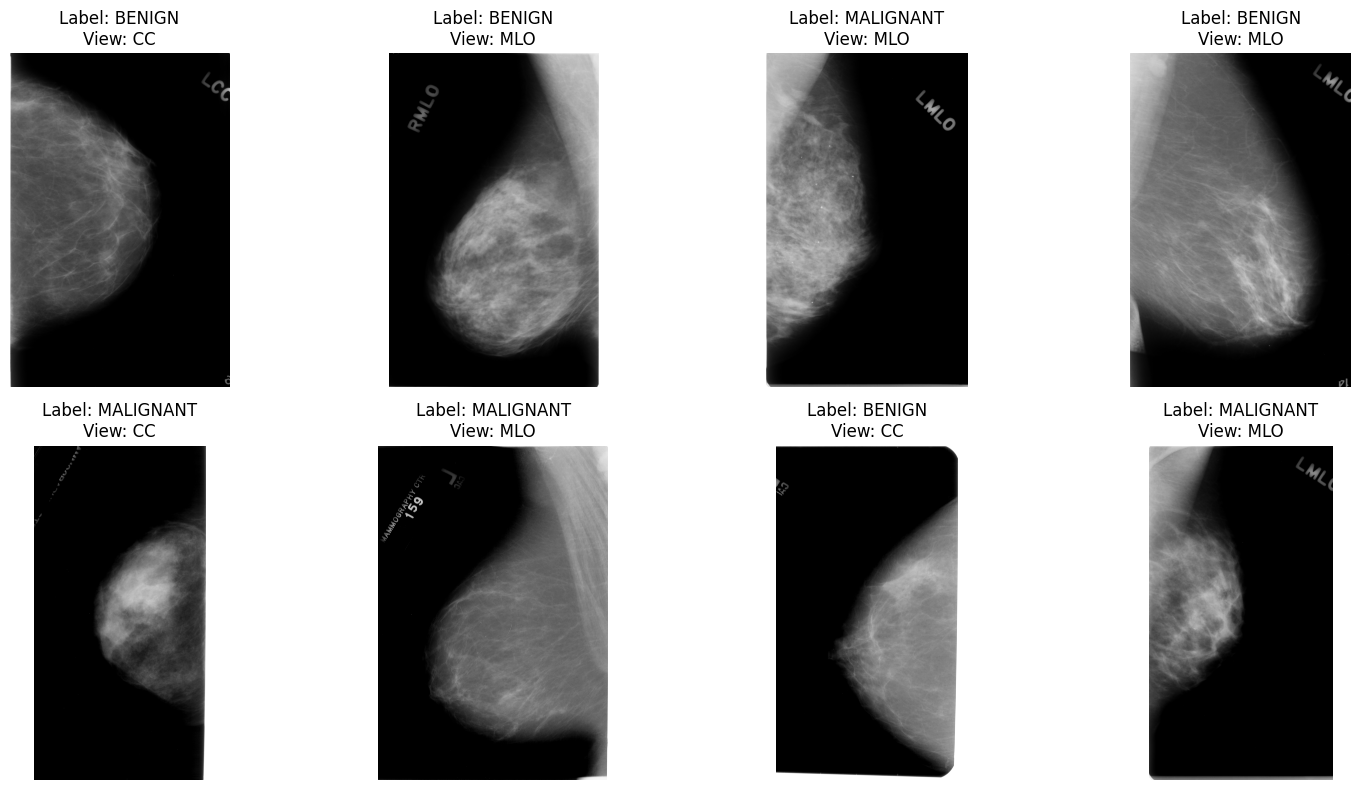

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Select a few records from the dataframe
sample_df = calc_new_df.sample(n=8)  # Adjust the number of images to display

# Create a 2x4 grid for displaying the images
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # 2 rows, 4 columns

# Loop through the rows and columns to display the images
for i, ax in enumerate(axes.flat):
    # Get the image path, pathology label, and image view
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['pathology']
    image_view = sample_df.iloc[i]['image view']  # Assuming this column exists
    
    # Load the image
    img = mpimg.imread(img_path)
    
    # Display the image
    ax.imshow(img, cmap='gray')  # Assuming the images are grayscale; use 'cmap' accordingly
    ax.set_title(f"Label: {label}\nView: {image_view}")
    ax.axis('off')  # Hide axis

# Adjust layout
plt.tight_layout()
plt.show()

In [104]:
mass_new_df.columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'mass shape', 'mass margins',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'Full PatientID',
       'image_path'],
      dtype='object')

In [105]:
calc_new_df.columns

Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'PatientID',
       'image_path'],
      dtype='object')

In [88]:
calc_new_df.rename(columns={'breast density': 'breast_density'}, inplace=True)

In [90]:
# Find common columns between mass_new_df and calc_new_df
common_columns = mass_new_df.columns.intersection(calc_new_df.columns)
common_columns

Index(['patient_id', 'breast_density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'assessment', 'pathology',
       'subtlety', 'image file path', 'cropped image file path',
       'ROI mask file path', 'Full PatientID', 'PatientID', 'image_path'],
      dtype='object')

In [107]:
# Concatenate the two DataFrames using only the common columns
combined_df = pd.concat([mass_new_df, calc_new_df], axis=0, join='inner', ignore_index=True)
combined_df.head()

patient_id left or right breast image view  abnormality id abnormality type  \
0    P_00001                 LEFT         CC               1             mass   
1    P_00001                 LEFT        MLO               1             mass   
2    P_00004                 LEFT         CC               1             mass   
3    P_00004                 LEFT        MLO               1             mass   
4    P_00004                RIGHT        MLO               1             mass   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                         PatientID  \
0    Mass-Training_P_00001_LEFT_CC   
1   Mass-Training_P_00001_LEFT_MLO   
2    Mass-Training_P_00004_LEFT_CC   
3   Mass-Training_P_00004_LEFT_MLO   
4  Mass-Training_P_00004_RIGHT_MLO   

                                          image_path  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386...  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359308...  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.891800...  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.295360...  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.410524...

In [97]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               2864 non-null   object
 1   breast_density           2864 non-null   int64 
 2   left or right breast     2864 non-null   object
 3   image view               2864 non-null   object
 4   abnormality id           2864 non-null   int64 
 5   abnormality type         2864 non-null   object
 6   assessment               2864 non-null   int64 
 7   pathology                2864 non-null   object
 8   subtlety                 2864 non-null   int64 
 9   image file path          2864 non-null   object
 10  cropped image file path  2864 non-null   object
 11  ROI mask file path       2864 non-null   object
 12  Full PatientID           2864 non-null   object
 13  PatientID                2864 non-null   object
 14  image_path               2864 non-null  

In [110]:
breast_cancer_df = combined_df[['pathology', 'left or right breast', 'image view', 'abnormality type', 'image_path']]
breast_cancer_df.head()

pathology left or right breast image view abnormality type  \
0  MALIGNANT                 LEFT         CC             mass   
1  MALIGNANT                 LEFT        MLO             mass   
2     BENIGN                 LEFT         CC             mass   
3     BENIGN                 LEFT        MLO             mass   
4     BENIGN                RIGHT        MLO             mass   

                                          image_path  
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.342386...  
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.359308...  
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.891800...  
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.295360...  
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.410524...

In [111]:
breast_cancer_df.to_csv('CBIS-DDSM_combined.csv', index=False)

In [1]:
import pandas as pd
breast_cancer_df = pd.read_csv('CBIS-DDSM_combined.csv')

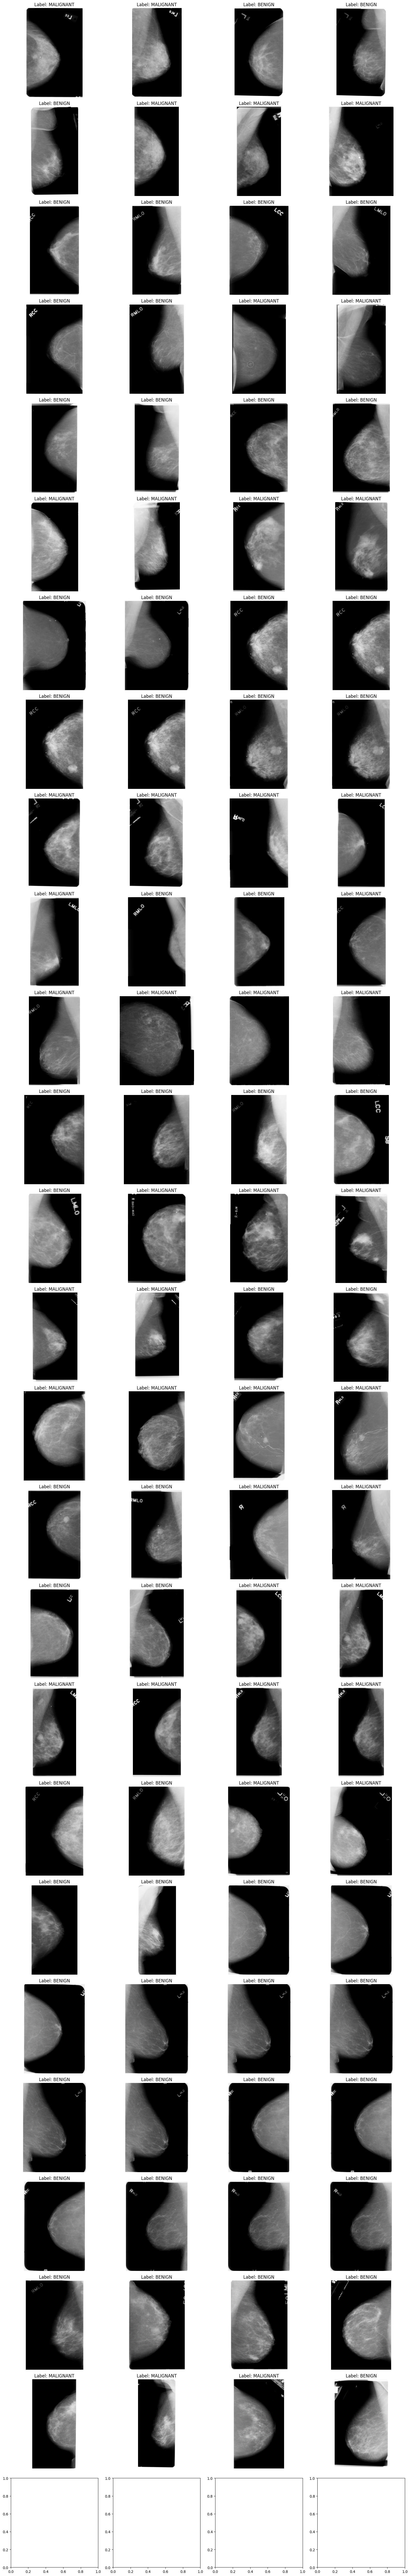

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Select the first 100 records from the DataFrame
sample_df = breast_cancer_df.head(100)

# Loop through the selected image paths in the 'image_path' column
fig, axes = plt.subplots(len(sample_df) // 4 + 1, 4, figsize=(16, len(sample_df) // 4 * 4))  # Adjust grid size

# Flatten the axes array to easily loop over it
axes = axes.flatten()

# Loop through the images and plot them
for i, ax in enumerate(axes):
    if i < len(sample_df):  # Check to ensure we don't go out of bounds
        img_path = sample_df.iloc[i]['image_path']
        
        # Load and display the image
        img = mpimg.imread(img_path)
        ax.imshow(img, cmap='gray')
        ax.axis('off')  # Hide axes

        # Optionally, set the title to show the pathology label
        label = sample_df.iloc[i]['pathology']
        ax.set_title(f"Label: {label}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
